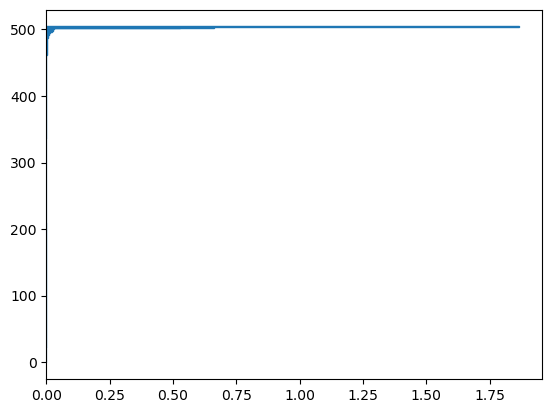

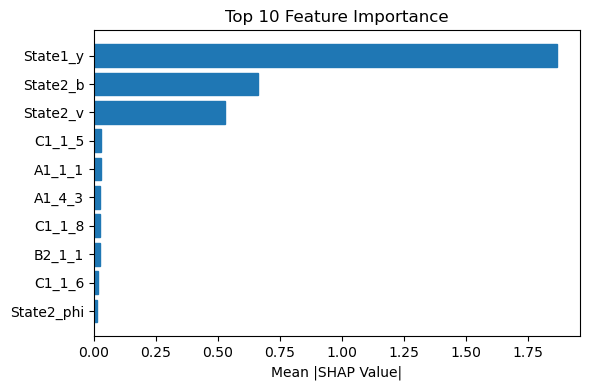

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
df = pd.read_csv('scalar_take2/action2/shap/baseline_3.758667.csv')  # Replace with your actual filename

# Remove the target column (assuming it's the last column based on your data)
target_col = df.columns[-1]  # 'P2 Vector Cost'
shap_values = df.drop(columns=[target_col])

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = shap_values.abs().mean().sort_values(ascending=True)
bars = plt.barh(range(len(mean_abs_shap)), mean_abs_shap.values)

# Optional: Color bars (blue like SHAP default)
for bar in bars:
    bar.set_color('#1f77b4')

# If you want only top N features (like top 20):
top_n = 10
top_features = mean_abs_shap.tail(top_n)  # Get top N

plt.figure(figsize=(6, 4))
bars = plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Feature Importance')

for bar in bars:
    bar.set_color('#1f77b4')

plt.tight_layout()
plt.show()

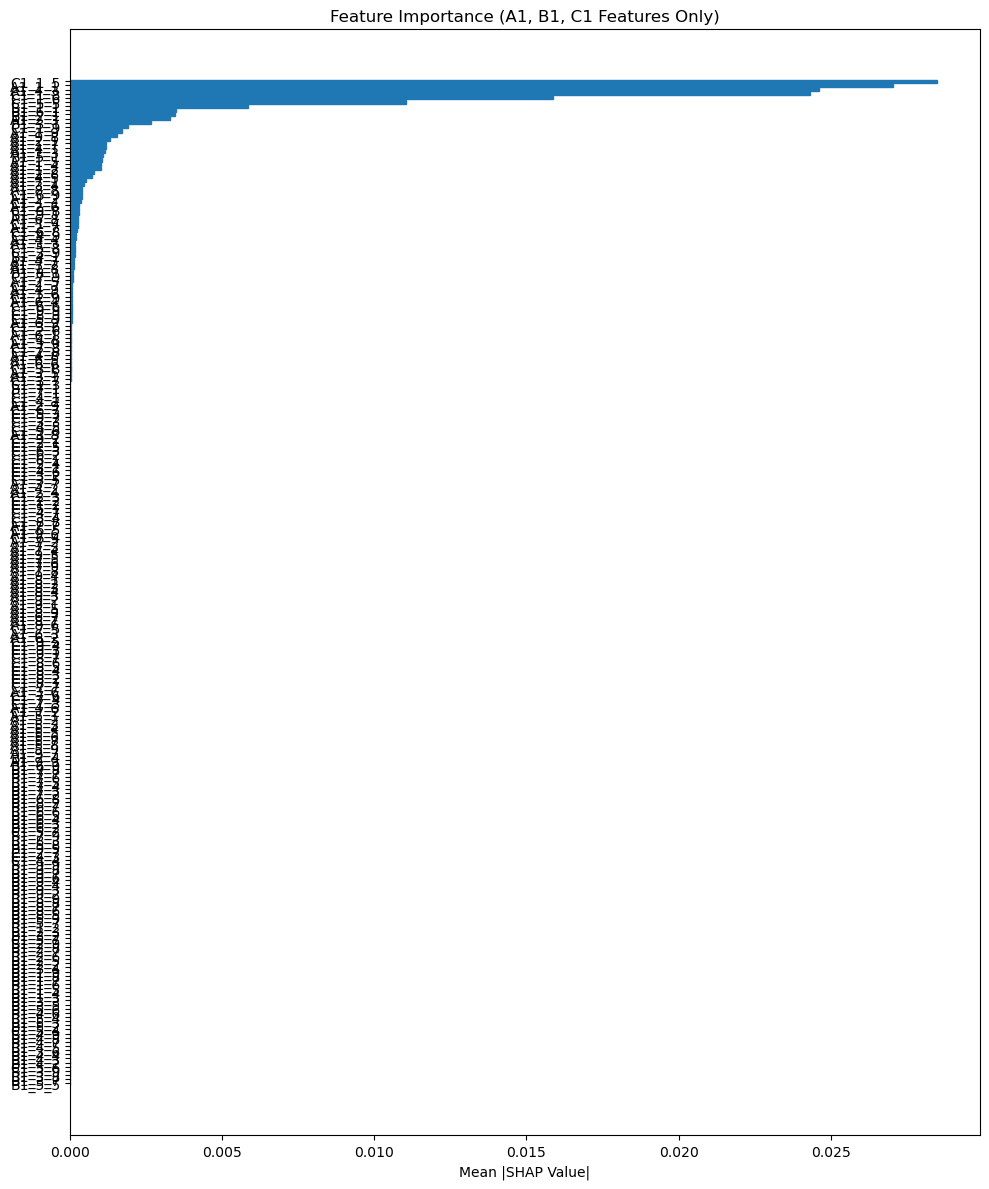

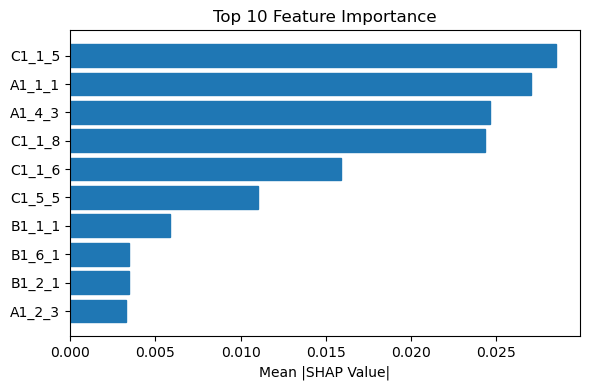

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


# Remove the target column (assuming it's the last column based on your data)
target_col = df.columns[-1]  # 'P2 Vector Cost'
shap_values = df.drop(columns=[target_col])

# Extract columns that start with A1, B1, or C1 (pattern: capital letter + 1)
pattern = r'^[ABC]1_'
filtered_columns = [col for col in shap_values.columns if re.match(pattern, col)]
filtered_data = shap_values[filtered_columns]

# Calculate mean absolute SHAP values for filtered features
mean_abs_shap = filtered_data.abs().mean().sort_values(ascending=True)

# Create bar plot (horizontal bars like SHAP's default)
plt.figure(figsize=(10, 12))
bars = plt.barh(range(len(mean_abs_shap)), mean_abs_shap.values)

# Set labels
plt.yticks(range(len(mean_abs_shap)), mean_abs_shap.index)
plt.xlabel('Mean |SHAP Value|')
plt.title('Feature Importance (A1, B1, C1 Features Only)')

# Color bars (blue like SHAP default)
for bar in bars:
    bar.set_color('#1f77b4')

plt.tight_layout()
plt.show()

# If you want only top N features (like top 20):
top_n = 10
top_features = mean_abs_shap.tail(top_n)  # Get top N

plt.figure(figsize=(6, 4))
bars = plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Feature Importance')

for bar in bars:
    bar.set_color('#1f77b4')

plt.tight_layout()
plt.show()

/tmp/ipykernel_86920/3219684408.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for colorbar


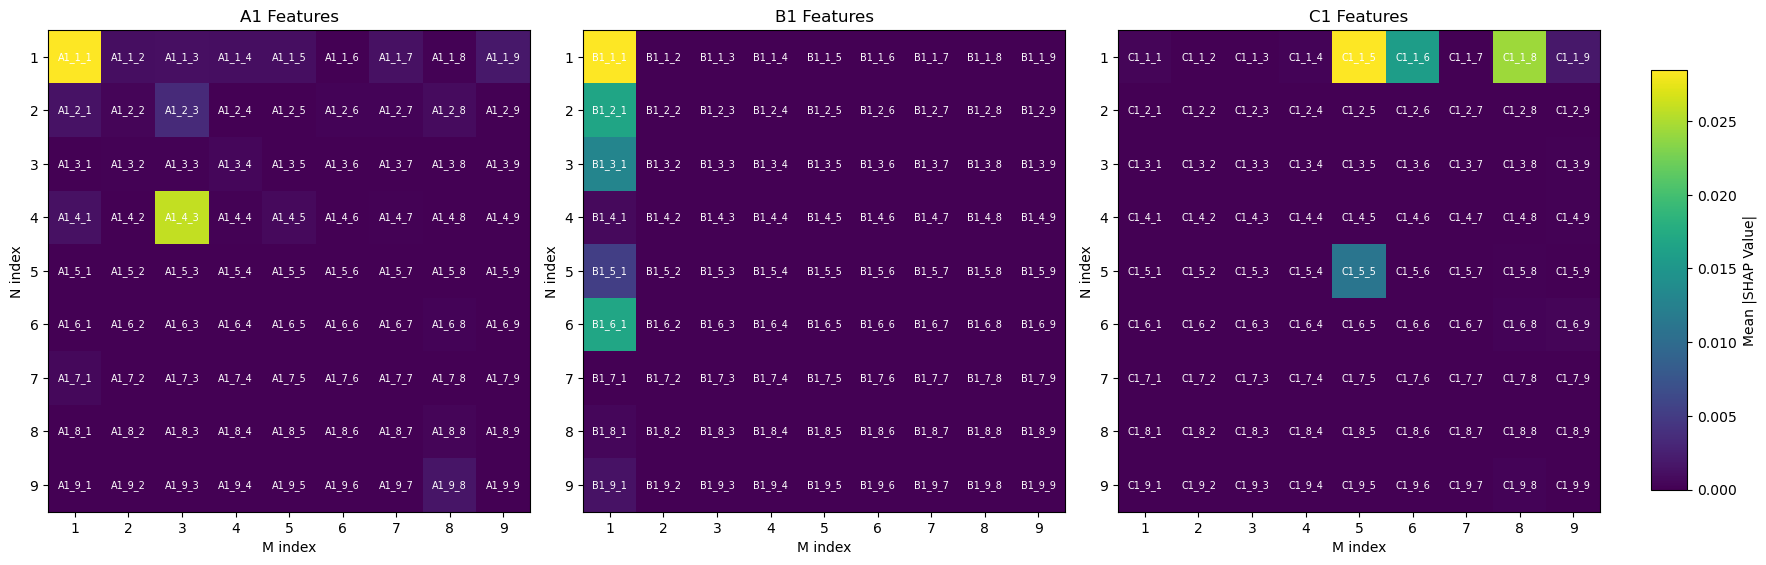

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Remove target column
target_col = df.columns[-1]
shap_values = df.drop(columns=[target_col])

# Extract A1, B1, C1 separately
groups = {"A1": [], "B1": [], "C1": []}
for col in shap_values.columns:
    match = re.match(r'^([ABC]1)_', col)
    if match:
        groups[match.group(1)].append(col)

# Compute mean |SHAP| values
mean_abs_shap = shap_values.abs().mean()

def extract_indices(name):
    try:
        _, n, m = name.split("_")
        return int(n), int(m)
    except:
        return None, None

def build_heatmap(features):
    valid = [(f, extract_indices(f)) for f in features if extract_indices(f) != (None, None)]
    if not valid:
        return None, None, 0, 0
    
    max_n = max(n for _, (n, m) in valid)
    max_m = max(m for _, (n, m) in valid)
    heatmap = np.full((max_n, max_m), np.nan)  # 1-based indexing
    
    for feature, (n, m) in valid:
        heatmap[n-1, m-1] = mean_abs_shap[feature]  # shift to 0-based index
    
    return heatmap, valid, max_n, max_m

# Plot A1, B1, C1 heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im = None
for ax, key in zip(axes, ["A1", "B1", "C1"]):
    heatmap, valid, max_n, max_m = build_heatmap(groups[key])
    if heatmap is None:
        ax.set_title(f"{key} Features (none)")
        ax.axis("off")
        continue
    
    im = ax.imshow(heatmap, cmap="viridis", origin="upper")
    
    # Add feature names inside each cell
    for feature, (n, m) in valid:
        ax.text(m-1, n-1, feature, ha="center", va="center", color="white", fontsize=7)
    
    # Axis ticks: start at 1, step by 1
    ax.set_xticks(np.arange(max_m))
    ax.set_yticks(np.arange(max_n))
    ax.set_xticklabels(np.arange(1, max_m+1))
    ax.set_yticklabels(np.arange(1, max_n+1))
    
    ax.set_title(f"{key} Features")
    ax.set_xlabel("M index")
    ax.set_ylabel("N index")

# Add a single colorbar to the right side
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label="Mean |SHAP Value|")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for colorbar
plt.show()
